In [51]:
import numpy as np
import pandas as pd
import time
from matplotlib import pyplot as plt
from functools import partial

# ML Scikit Imports
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import img_to_array, load_img


# a décommenter si problème avec le GPU de votre machine
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
#for gpu in physical_devices:
#    tf.config.experimental.set_memory_growth(gpu, True)


 # imports locaux
#from usefulCmdsAndFcns import load_batch, importData2, prepare_datasets, normalize_features, encode_labels, learningCurves, ConfusionEvaluation, display_conv_filters_kv


# links with google drive and colab
import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
   from google.colab import drive
   drive.mount('/content/gdrive')
   code_folder = '/content/gdrive/My Drive/machine_learning/Reinforcement Learning' # remplacer par le chemin vers ce notebook à partir de My Drive/...
   %cd "$code_folder"
   !ls "$code_folder"


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/machine_learning/Reinforcement Learning
'Copie de sound.ipynb'	 results		 sound_memory.ipynb
 features_prof.csv	 sound_brouillon.ipynb	 sound_model_raspberry.ipynb
 features_test.csv	 sound.ipynb
 features_train.csv	 sound_lite.ipynb


In [52]:
LABEL_PATH_TRAIN = r'./features_train.csv'
LABEL_PATH_TEST = r'./features_test.csv'
LABEL_PATH = r'./features_prof.csv'

data_train = pd.read_csv(LABEL_PATH_TRAIN)
data_train.head()

data_test = pd.read_csv(LABEL_PATH_TEST)
data_test.head()
data = pd.read_csv(LABEL_PATH_TEST)
data.head()

X_train = data_train.iloc[:, :512]
y_train = data_train.iloc[:, 512]

X_test = data_test.iloc[:, :512]
y_test = data_test.iloc[:, 512]

feature_values = data.iloc[:, :512]
label_names = data.iloc[:, 512]


In [53]:

# X_train, X_test, y_train, y_test = train_test_split(feature_values,
#                                                                                             label_names,
#                                                                                             test_size=0.5,
#                                                                                           stratify=np.array(
#                                                                                                 label_names),
#                                                                                             random_state=42)
# X_test, X_val, y_test, y_val = train_test_split(X_test,
#                                                                                             y_test,
#                                                                                             test_size=0.5,
#                                                                                             stratify=np.array(
#                                                                                                 y_test),
#                                                                                             random_state=42)              

m = y_train.shape[0]
print(m)
n = y_test.shape[0]
print(n)

670
330


In [54]:
labelNames_unique = label_names.unique()

label_nb = labelNames_unique.shape[0]

# enc labelNames to indices
encName2Ind = preprocessing.LabelEncoder()
encName2Ind.fit(labelNames_unique)
labelIndices_unique = encName2Ind.transform(labelNames_unique)
labelIndices  = encName2Ind.transform(label_names)

y_train = encName2Ind.transform(y_train)
y_test = encName2Ind.transform(y_test)

X_train = np.array(X_train)
X_test = np.array(X_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

y_train = y_train.reshape((m,1))
y_test = y_test.reshape((n,1))

print(X_train.shape, y_train.shape)

(670, 512) (670, 1)


In [55]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Dense(256, activation='relu', input_dim=X_train.shape[1]))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [56]:
t0 = time.time()

history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=100,

)
tfin = time.time()
duration = tfin - t0
print("**************************************************\n")
print("*** Complexite temporelle du reseaux de neurones : ", duration, "  secondes ***" )
print("**************************************************\n")


Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


11/11 [==============================] - 0s 4ms/step - loss: 114.9225 - accuracy: 0.1209
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 33.7255 - accuracy: 0.2149
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 19.8997 - accuracy: 0.2597
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 14.7902 - accuracy: 0.3015
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 11.3478 - accuracy: 0.3687
Epoch 6/100
11/11 [==============================] - 0s 5ms/step - loss: 9.7960 - accuracy: 0.4224
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 8.8902 - accuracy: 0.4209
Epoch 8/100
11/11 [==============================] - 0s 5ms/step - loss: 7.7758 - accuracy: 0.4910
Epoch 9/100
11/11 [==============================] - 0s 4ms/step - loss: 7.1006 - accuracy: 0.5313
Epoch 10/100
11/11 [==============================] - 0s 4ms/step - loss: 4.5924 - accuracy: 0.5731
Epoch 11/100
11

In [57]:
model.evaluate(X_test,  y_test, verbose=2)

11/11 - 0s - loss: 5.5912 - accuracy: 0.6212 - 123ms/epoch - 11ms/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


[5.591221809387207, 0.6212121248245239]

In [58]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

print(np.argmax(probability_model(X_test[:5]), axis=1))

print(y_test[:5])
print(history.history.keys())


[7 0 7 6 1]
[[7]
 [5]
 [7]
 [6]
 [1]]
dict_keys(['loss', 'accuracy'])


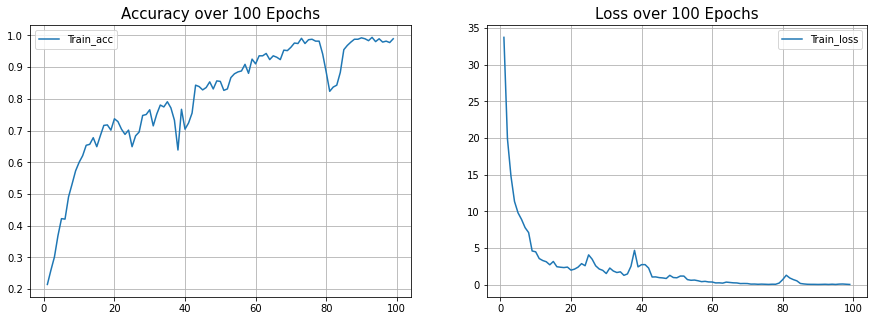

In [59]:
def plot_acc_loss(results, epochs):
 acc = results.history['accuracy']
 loss = results.history['loss']


 plt.figure(figsize=(15, 5))
 plt.subplot(121)
 plt.plot(range(1,epochs), acc[1:], label='Train_acc')

 plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.subplot(122)
 plt.plot(range(1,epochs), loss[1:], label='Train_loss')
 plt.title('Loss over ' + str(epochs) +  ' Epochs', size=15)
 plt.legend()
 plt.grid(True)
 plt.show()
 
plot_acc_loss(history, 100)



In [60]:
# Save model
RESULT_PATH = './results/'
model.save(RESULT_PATH+"/model.h5")